# Alcohol Experiemnt


## PSD Generator


/Users/jonathannguyen/Downloads/AlcoholExperiment


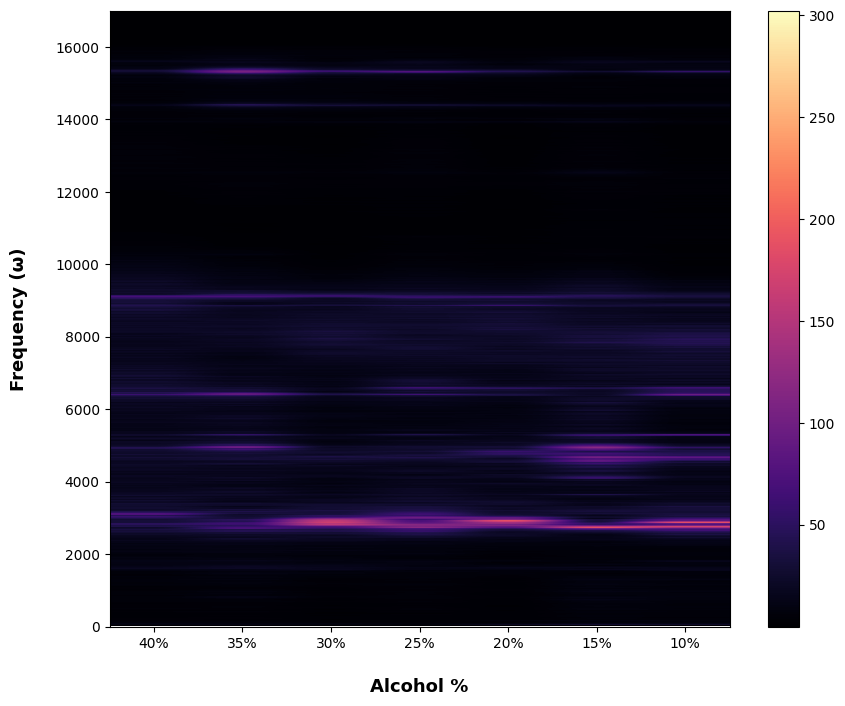

In [1]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpk
import numpy as np
from matplotlib import pyplot as plt


import os
print(os.getcwd())

size = 48016
PSD = np.zeros((size, 7))

for k,j in enumerate([40, 35, 30, 25, 20, 15, 10]):
    FFTfinal = np.zeros(size)
    
    for i in range(10):
        s_rate, signal = wavfile.read(f"./{j}%/{j}%D{i}.wav") 
        usedSignal = signal[:size]/10000
        FFT = abs(np.fft.fft(usedSignal))
        freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
        FFTfinal += FFT


    FFTfinal = FFTfinal/10
    PSD[:,k] = FFTfinal
    

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(X=(PSD[:size//2, :]), cmap="magma", aspect="auto")
plt.colorbar(heatmap)

plt.xticks((0, 1, 2, 3, 4, 5, 6), ("40%", "35%", "30%", "25%", "20%", "15%", "10%"))
plt.ylim(0, 17000)
plt.ylabel("Frequency (\u03C9)", labelpad=20, weight= "bold", size= 13)
plt.xlabel("Alcohol %", labelpad= 20, weight="bold", size = 13)

plt.show()

## Graph Frequency Generator


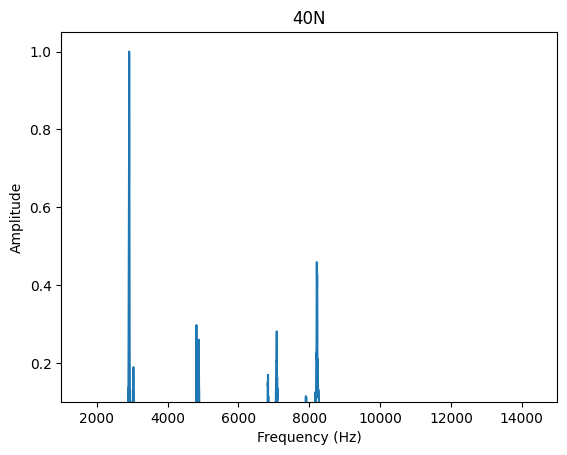

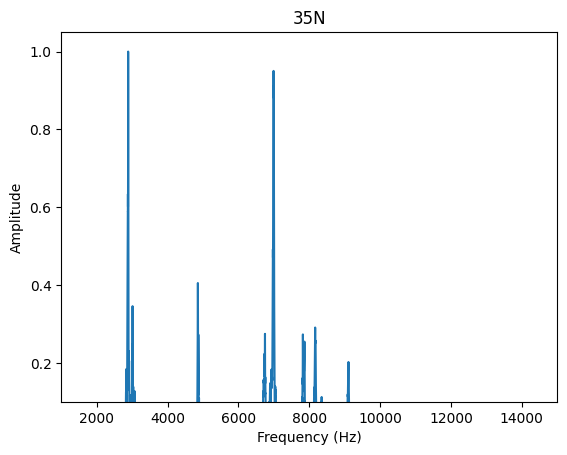

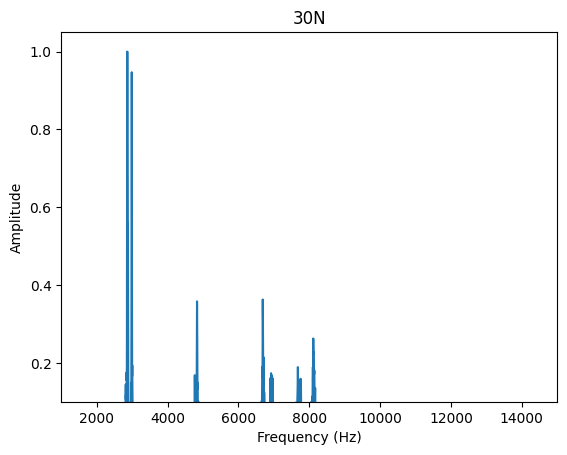

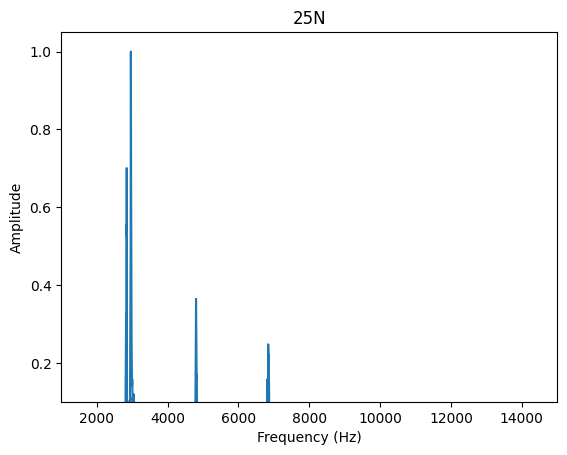

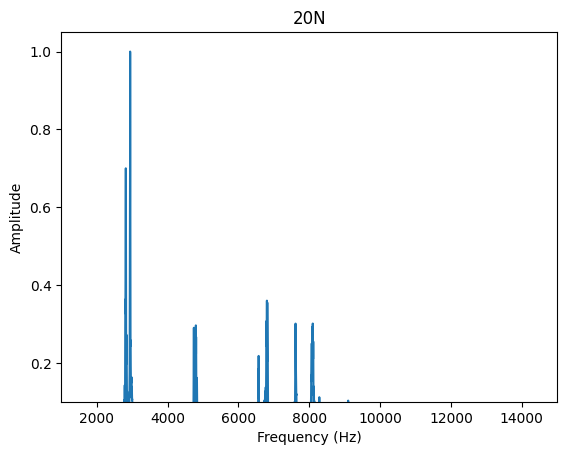

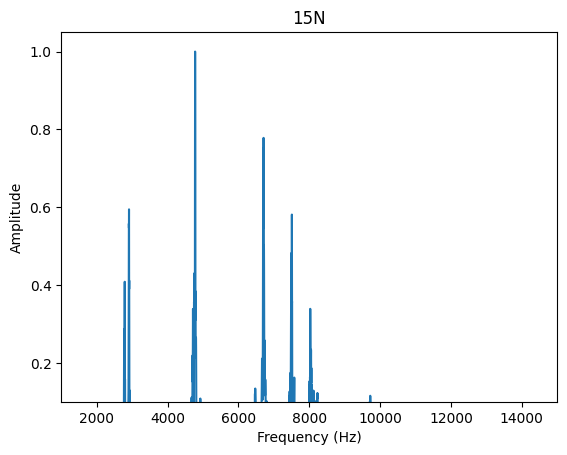

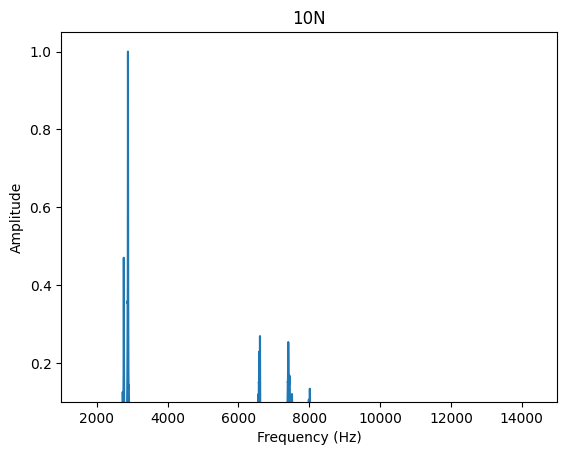

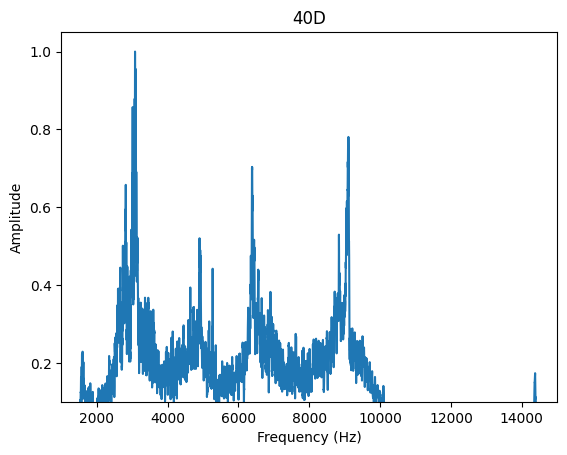

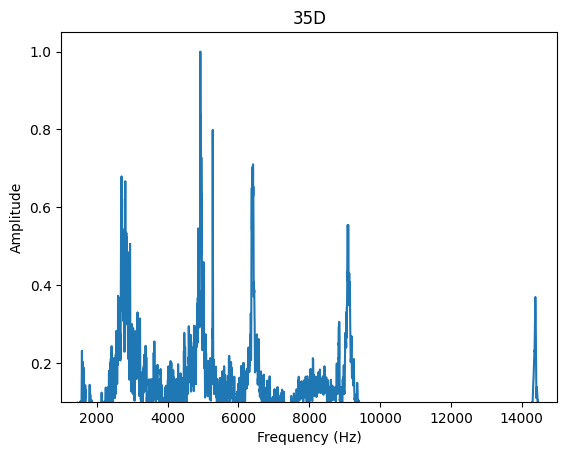

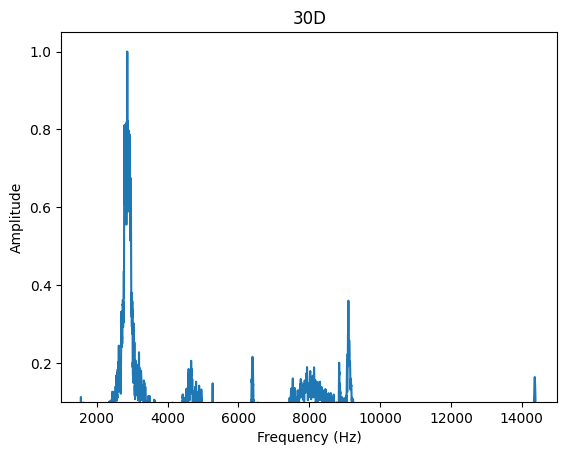

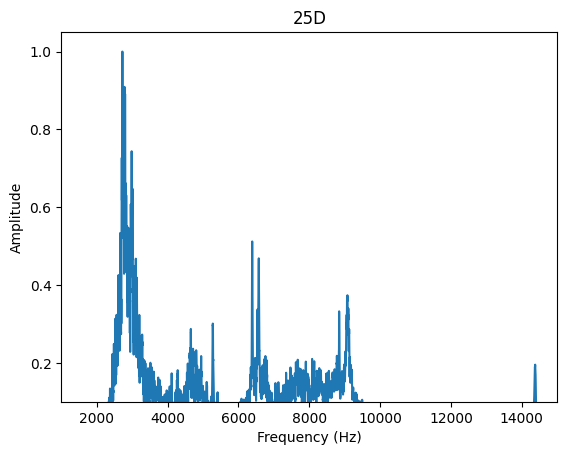

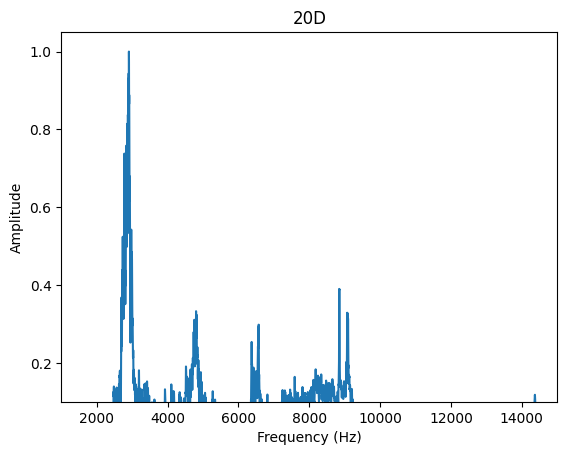

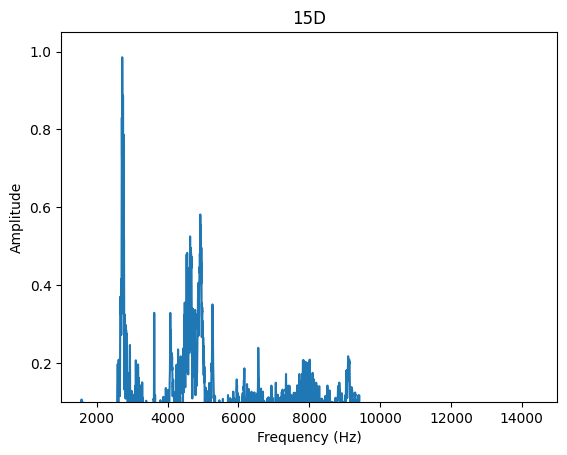

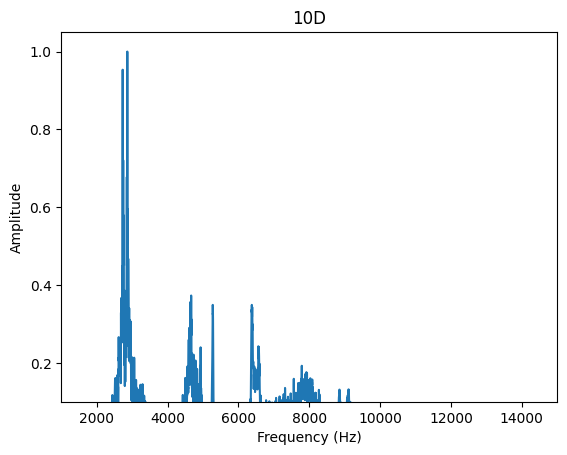

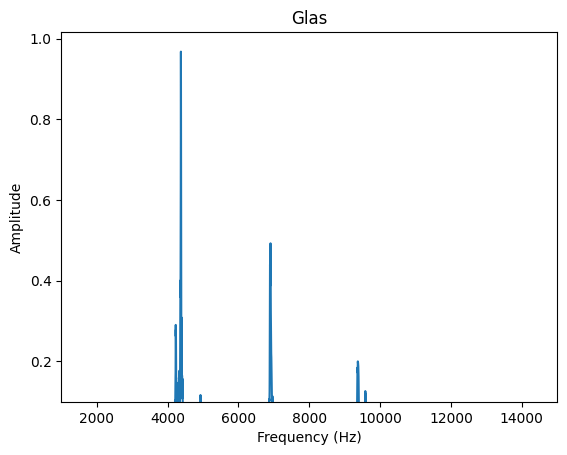

In [2]:
size = 48016
PSD = np.zeros((size, 7))

for char in ['N', 'D']:
    for k,j in enumerate([40, 35, 30, 25, 20, 15, 10]):
        FFTfinal = np.zeros(size)
        
        for i in range(10):
            s_rate, signal = wavfile.read(f"./{j}%/{j}%{char}{i}.wav") 
            usedSignal = signal[:size]/10000
            FFT = abs(np.fft.fft(usedSignal))
            freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
            FFTfinal += FFT
        
        FFTfinal = FFTfinal/10*np.max(FFTfinal)
        FFTfinal = FFTfinal/np.max(FFTfinal)
        plt.figure()
        plt.plot(freqs[range(len(FFTfinal)//2)], FFTfinal[range(len(FFTfinal)//2)])                                                          
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.xlim(1000, 15000)
        plt.title(f"{j}{char}")
        plt.ylim(1e-1, )
        plt.show()

for i in range(10):
        s_rate, signal = wavfile.read(f"./Glas/Glas{i}.wav") 
        usedSignal = signal[:size]/10000
        FFT = abs(np.fft.fft(usedSignal))
        freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
        FFTfinal += FFT
        
FFTfinal = FFTfinal/10
FFTfinal = FFTfinal/np.max(FFT)
plt.figure()
plt.plot(freqs[range(len(FFTfinal)//2)], FFTfinal[range(len(FFTfinal)//2)])                                                          
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(1000, 15000)
plt.title("Glas")
plt.ylim(1e-1, )
plt.show()

            
   

## Lorentzian Fit


### Normal Mode


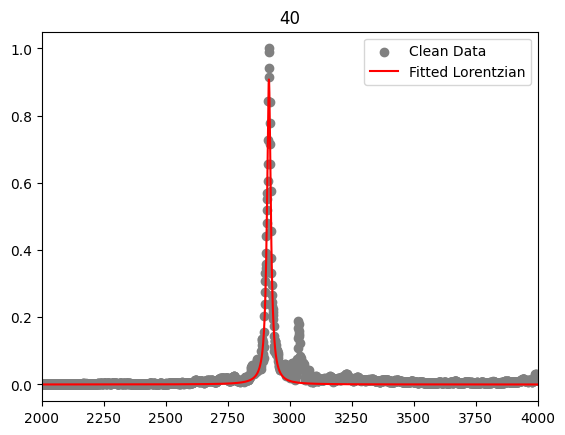

Fitted gamma: 9.160386247506475


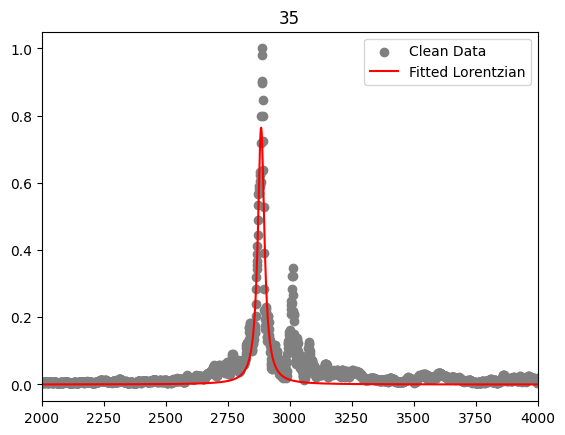

Fitted gamma: 15.833899470639365


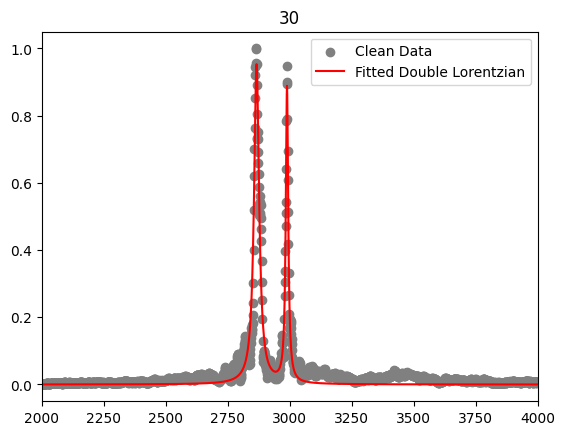

Fitted gamma_1: 12.298220803071732
Fitted gamma_2: 5.895977594028391


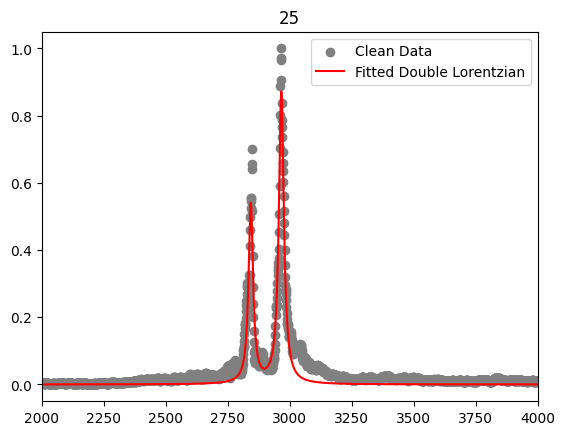

Fitted gamma_1: 10.971084571924377
Fitted gamma_2: 12.118908290836501


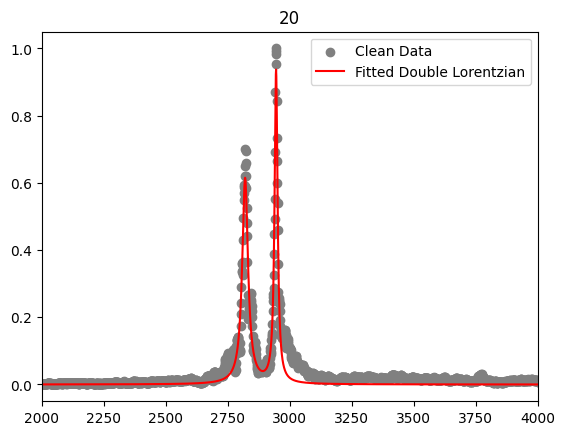

Fitted gamma_1: 14.02850711756696
Fitted gamma_2: 7.332454020384842


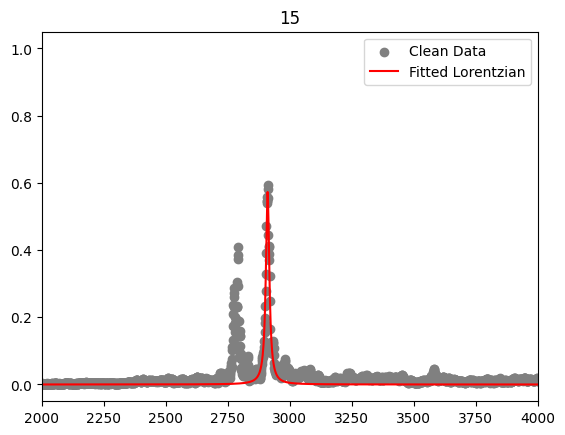

Fitted gamma: 8.365986123876288


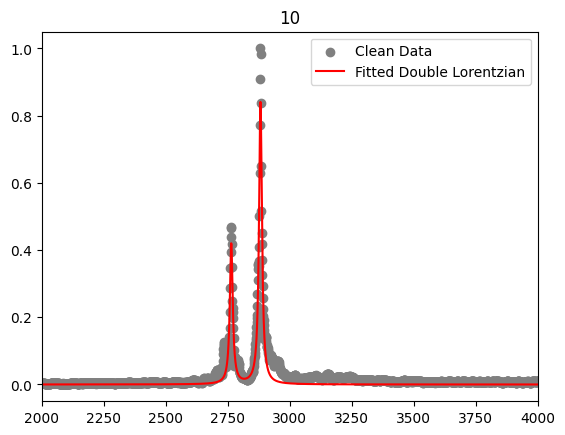

Fitted gamma_1: 7.055655575923961
Fitted gamma_2: 7.035615023098671
[ 7.05565558  8.36598612 14.02850712 10.97108457 12.2982208  15.83389947
  9.16038625]


[ 0.          0.          5.89597759 12.11890829  7.33245402  0.
  7.03561502]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Define the Lorentzian function
def lorentzian(x, x0, gamma, A):
    return A / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# Define the double Lorentzian function
def double_lorentzian(x, x0_1, gamma_1, A_1, x0_2, gamma_2, A_2):
    lorentzian_1 = A_1 / (np.pi * gamma_1 * (1 + ((x - x0_1) / gamma_1)**2))
    lorentzian_2 = A_2 / (np.pi * gamma_2 * (1 + ((x - x0_2) / gamma_2)**2))
    return lorentzian_1 + lorentzian_2

GammaNormal1 = np.zeros(7)
GammaNormal2 = np.zeros(7)

for k,j in enumerate([40, 35, 30, 25, 20, 15, 10]):
        FFTfinal = np.zeros(size)

        #--------------------------Single Lorentzian--------------------

        if j == 40 or j == 35 or j == 15:
            for i in range(10):
                s_rate, signal = wavfile.read(f"./{j}%/{j}%N{i}.wav") 
                usedSignal = signal[:size]/10000
                FFT = abs(np.fft.fft(usedSignal))
                freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
                FFTfinal += FFT

            # Load your own data here
            x_data = freqs[:size//9]
            y_data_clean = FFTfinal[:size//9]/np.max(FFTfinal)

            # Fitting process
            initial_guess = [2800, 20, 12000]

            #Special Fitting for 15%
            if j == 15:
                initial_guess = [2700, 20, 1000]

            fit_params, covariance = curve_fit(lorentzian, x_data, y_data_clean, p0=initial_guess)

            # Extract the fitted parameters
            x0_fit, gamma_fit, A_fit = fit_params

            # Plotting
            plt.scatter(x_data, y_data_clean, label='Clean Data', color="grey")
            plt.plot(x_data, lorentzian(x_data, x0_fit, gamma_fit, A_fit), label='Fitted Lorentzian', color='red')
            plt.title(f"{j}")
            plt.xlim(2000, 4000)
            plt.legend()

            # Show the plot
            plt.show()
            print(f"Fitted gamma: {gamma_fit}")
            GammaNormal1[k] = gamma_fit
            continue

        #--------------------------Double Lorentzian--------------------

        for i in range(10):
            s_rate, signal = wavfile.read(f"./{j}%/{j}%N{i}.wav") 
            usedSignal = signal[:size]/10000
            FFT = abs(np.fft.fft(usedSignal))
            freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
            FFTfinal += FFT

        x_data = freqs[:size//9]
        y_data_clean = FFTfinal[:size//9]/np.max(FFTfinal)


        # Initial guess for parameters [x0_1, gamma_1, A_1, x0_2, gamma_2, A_2]
        initial_guess = [2750, 10, 12000, 3000, 10, 8000]

        # Fit the double Lorentzian function to the clean data
        fit_params, covariance = curve_fit(double_lorentzian, x_data, y_data_clean, p0=initial_guess)

        # Extract the fitted parameters
        x0_1_fit, gamma_1_fit, A_1_fit, x0_2_fit, gamma_2_fit, A_2_fit = fit_params

        # Plotting
        plt.scatter(x_data, y_data_clean, label='Clean Data', color='grey')
        plt.plot(x_data, double_lorentzian(x_data, x0_1_fit, gamma_1_fit, A_1_fit, x0_2_fit, gamma_2_fit, A_2_fit), color="red", label='Fitted Double Lorentzian')
        plt.xlim(2000, 4000)
        plt.title(f"{j}")
        plt.legend()

        GammaNormal1[k] = gamma_1_fit
        GammaNormal2[k] = gamma_2_fit
        

        # Show the plot
        plt.show()
               

        # Print the fitted gamma parameters
        print(f"Fitted gamma_1: {gamma_1_fit}")
        print(f"Fitted gamma_2: {gamma_2_fit}")

GammaNormal1 = np.array(GammaNormal1)
GammaNormal1 = GammaNormal1[::-1]
print(GammaNormal1)
print("\n")
print(GammaNormal2)


### Damped Mode


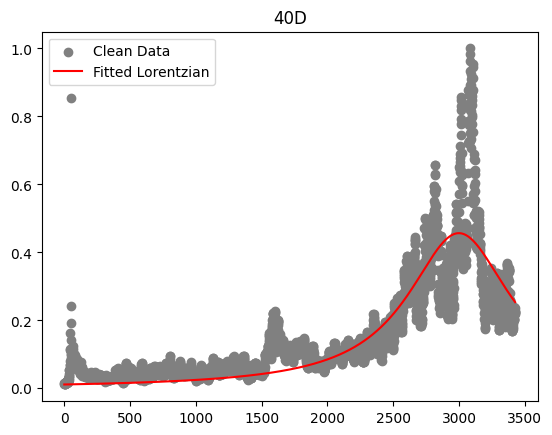

Fitted gamma: 477.9805014861531


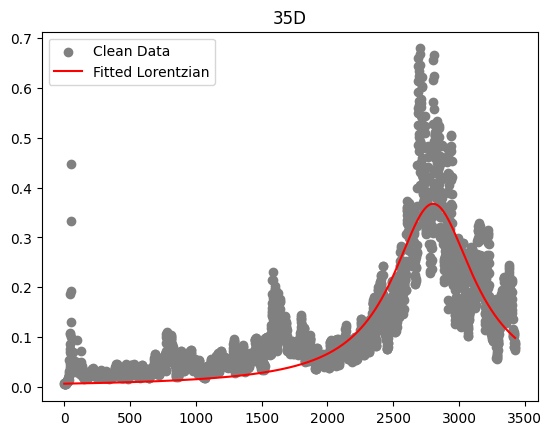

Fitted gamma: 376.85116476178956


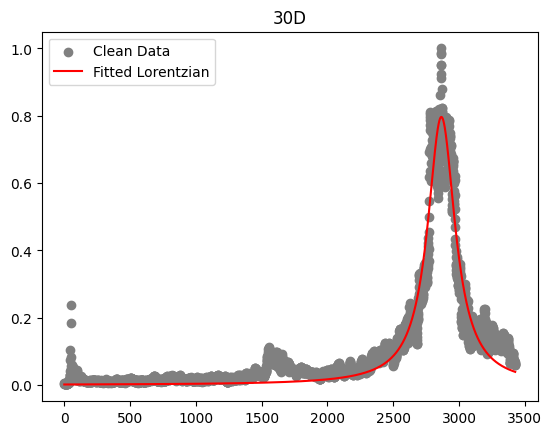

Fitted gamma: 127.41976138403513


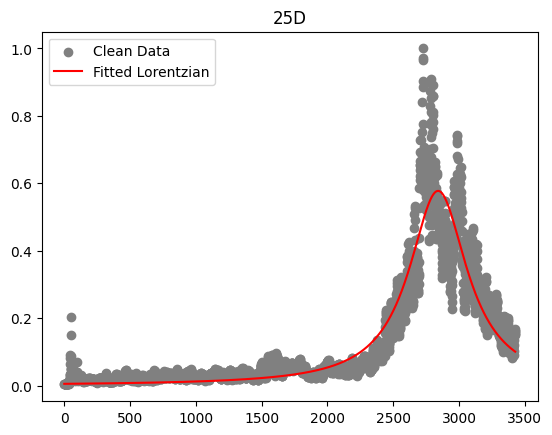

Fitted gamma: 268.9805191347152


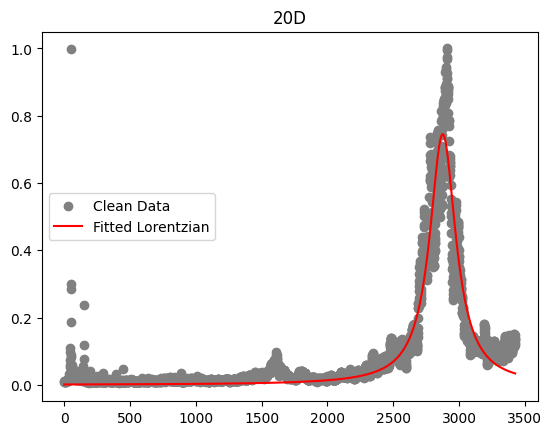

Fitted gamma: 120.59774802102206


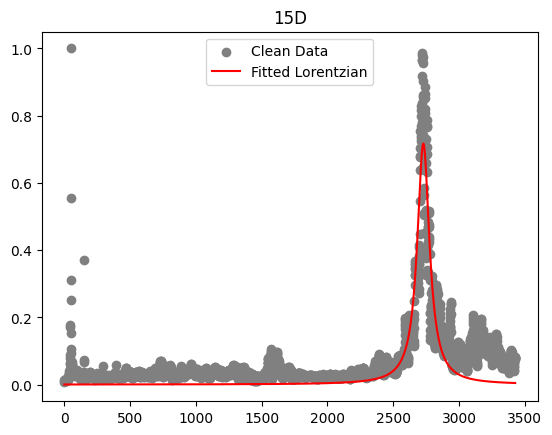

Fitted gamma: 56.29360053357774


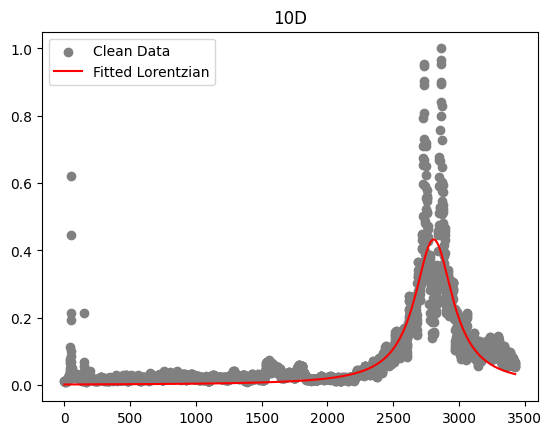

Fitted gamma: 176.59036605677446

[176.59036606  56.29360053 120.59774802 268.98051913 127.41976138
 376.85116476 477.98050149]


In [4]:
GammaDamped = np.zeros(7)

for k,j in enumerate([40, 35, 30, 25, 20, 15, 10]):
            FFTfinal = np.zeros(size)
            #--------------------------Single Lorentzian--------------------
            for i in range(10):
                s_rate, signal = wavfile.read(f"./{j}%/{j}%D{i}.wav") 
                usedSignal = signal[:size]/10000
                FFT = abs(np.fft.fft(usedSignal))
                freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
                FFTfinal += FFT

            # Load your own data here
            x_data = freqs[:size//14]
            y_data_clean = FFTfinal[:size//14]/np.max(FFTfinal)

            # Fitting process
            initial_guess = [2800, 50, 1400]            

            fit_params, covariance = curve_fit(lorentzian, x_data, y_data_clean, p0=initial_guess)

            # Extract the fitted parameters
            x0_fit, gamma_fit, A_fit = fit_params

            # Plotting
            plt.scatter(x_data, y_data_clean, label='Clean Data', color ="grey")
            plt.plot(x_data, lorentzian(x_data, x0_fit, gamma_fit, A_fit), label='Fitted Lorentzian', color='red')
            plt.title(f"{j}D")
            plt.legend()

            # Show the plot
            GammaDamped[k] = gamma_fit
            plt.show()
            print(f"Fitted gamma: {gamma_fit}")
            
GammaDamped = np.array(GammaDamped)
GammaDamped = GammaDamped[::-1]
print(f"\n{GammaDamped}")

## Dampening Coefficent Graph


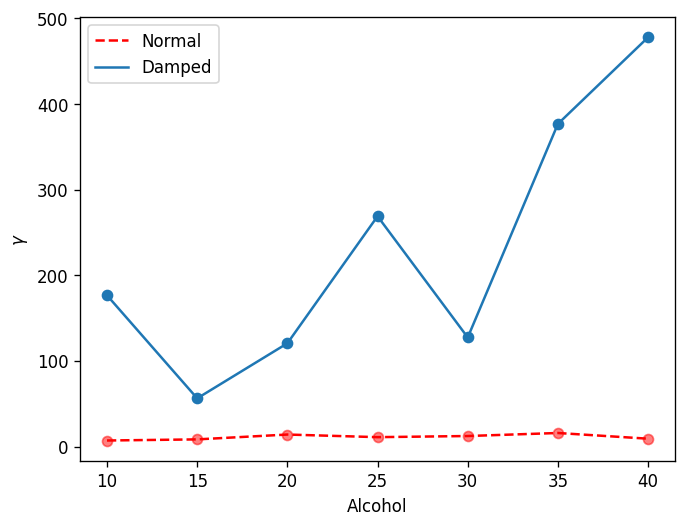

In [5]:
Alcohol = np.array([10, 15, 20,25, 30, 35, 40])

fig, ax = plt.subplots(dpi=120)

# Create a scatter plot
plt.scatter(Alcohol, GammaNormal1, color="red", alpha=0.5)
plt.plot(Alcohol, GammaNormal1, color="red", linestyle="dashed", label="Normal")

plt.scatter(Alcohol, GammaDamped)
plt.plot(Alcohol, GammaDamped, label="Damped")

# Add labels and title
plt.xlabel('Alcohol')
plt.ylabel(r'$\gamma$')


# Show the plot
plt.legend()
plt.show()
